# Proyek Analisis Data : [Bike-sharing-dataset.zip]

- Nama : Astri Deviyana
- Email : astrideviana31@gmail.com
- ID Dicoding : astri_deviana

# Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda berubah seiring dengan perubahan musim?

2. Apakah ada hubungan antara kondisi cuaca (misalnya, suhu, kelembaban, dan kecepatan angin) dengan jumlah penggunaan sepeda?

# Data Wrangling

## Gathering Data

In [3]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data Tabel day_df

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Cleaning Data Tabel day_df

In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Assesing Data Tabel hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Cleaning Data Tabel hour_df

In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

Jumlah Duplikasi:  0


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Exploratory Data Analysis

## Explore Tabel day_df

In [15]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
360,361,2011-12-27,1,0,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450,103,1059,1162
439,440,2012-03-15,1,1,3,0,4,1,1,0.557500,0.532825,0.579583,0.149883,1005,5187,6192
16,17,2011-01-17,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
181,182,2011-07-01,3,0,7,0,5,1,1,0.722500,0.652162,0.396250,0.102608,1246,4116,5362
232,233,2011-08-21,3,0,8,0,0,0,1,0.710833,0.675525,0.770000,0.248754,1249,2624,3873


In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


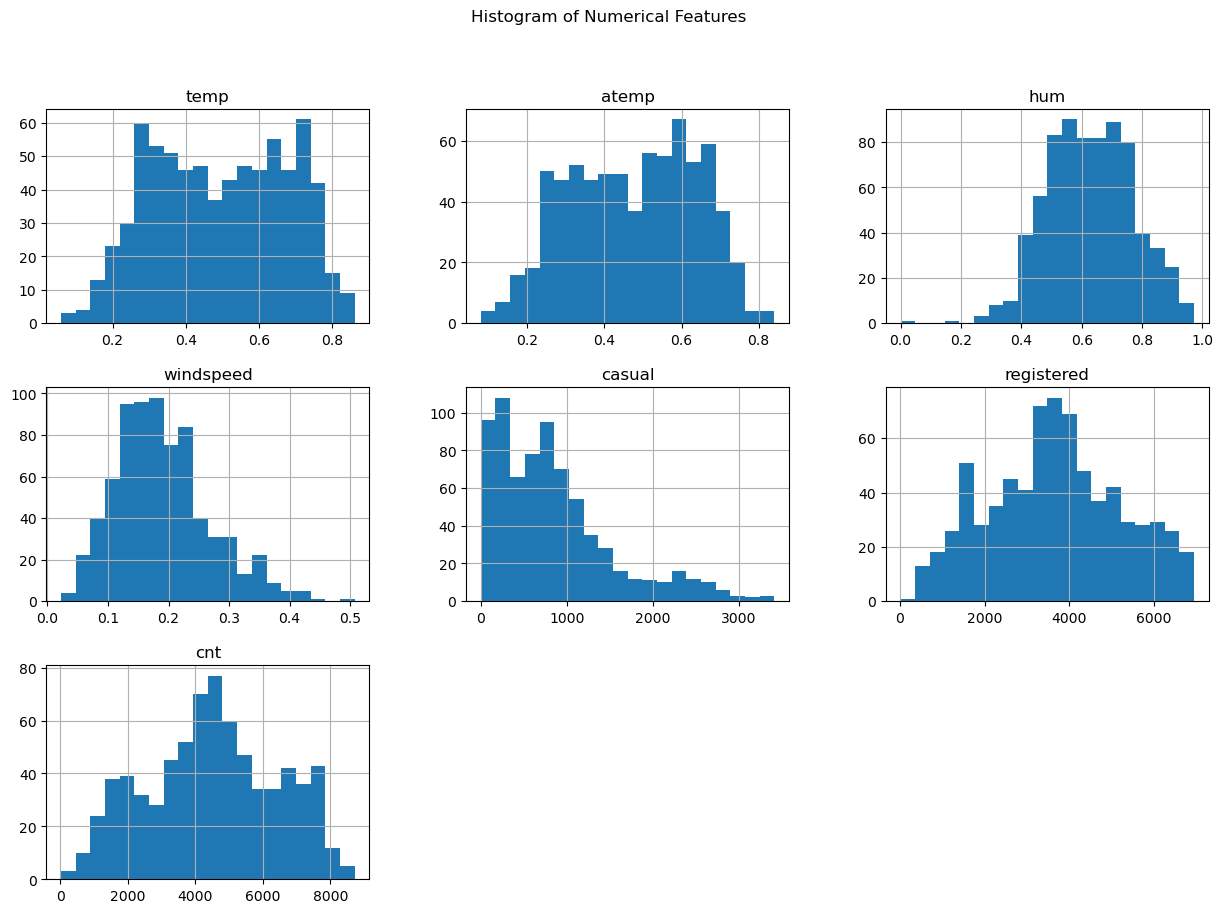

In [17]:
# Visualisasi Distribusi Data
# Histogram Untuk Variabel Numerik

numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
day_df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

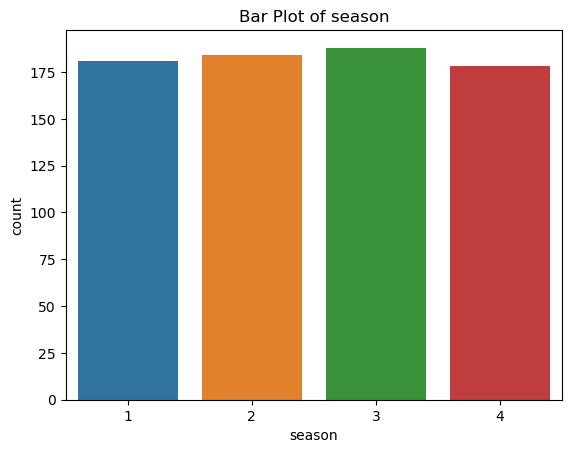

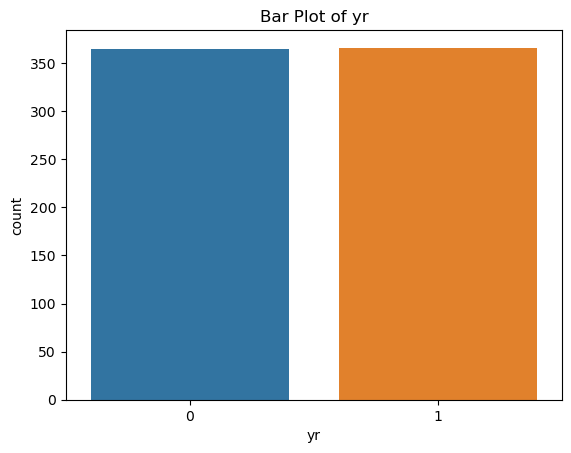

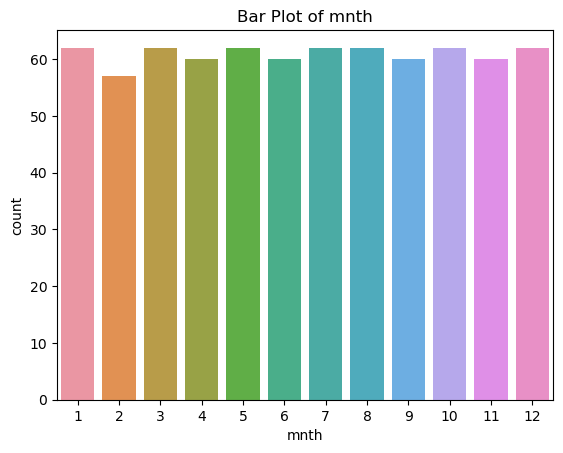

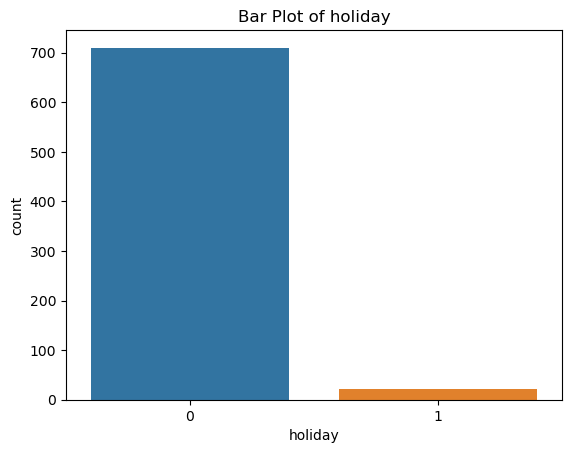

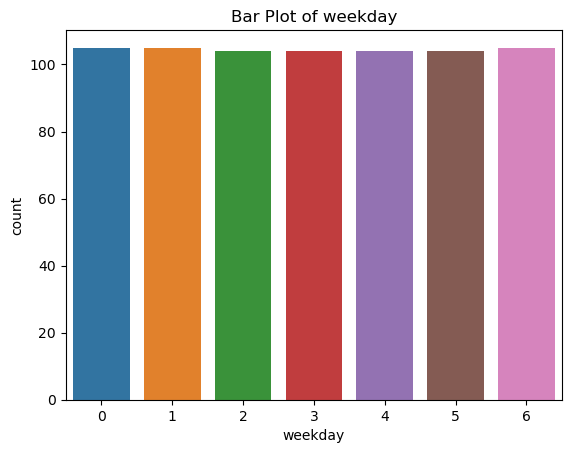

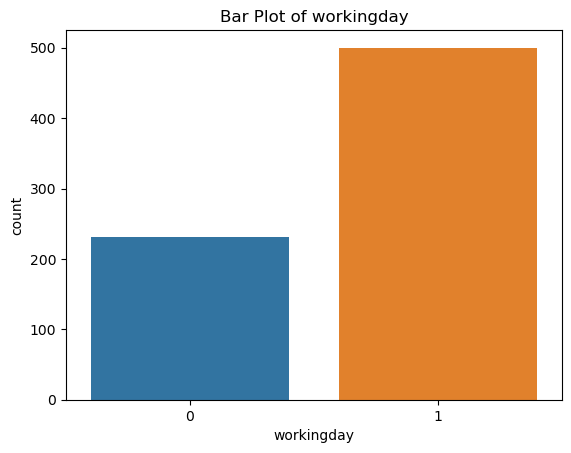

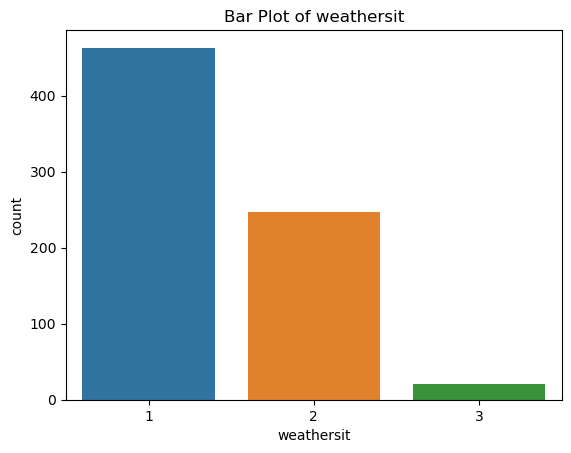

In [18]:
# Bar Plot Untuk Variabel Kategorikal

categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features:
    sns.countplot(x=feature, data=day_df)
    plt.title(f'Bar Plot of {feature}')
    plt.show()

In [20]:
# Menghapus Kolom 'dteday' sebelum menghitung korelasi

day_df_numeric = day_df.drop(columns=['dteday'])

In [21]:
# Menghitung Korelasi Antar Variabel Numerik

correlation = day_df_numeric.corr()

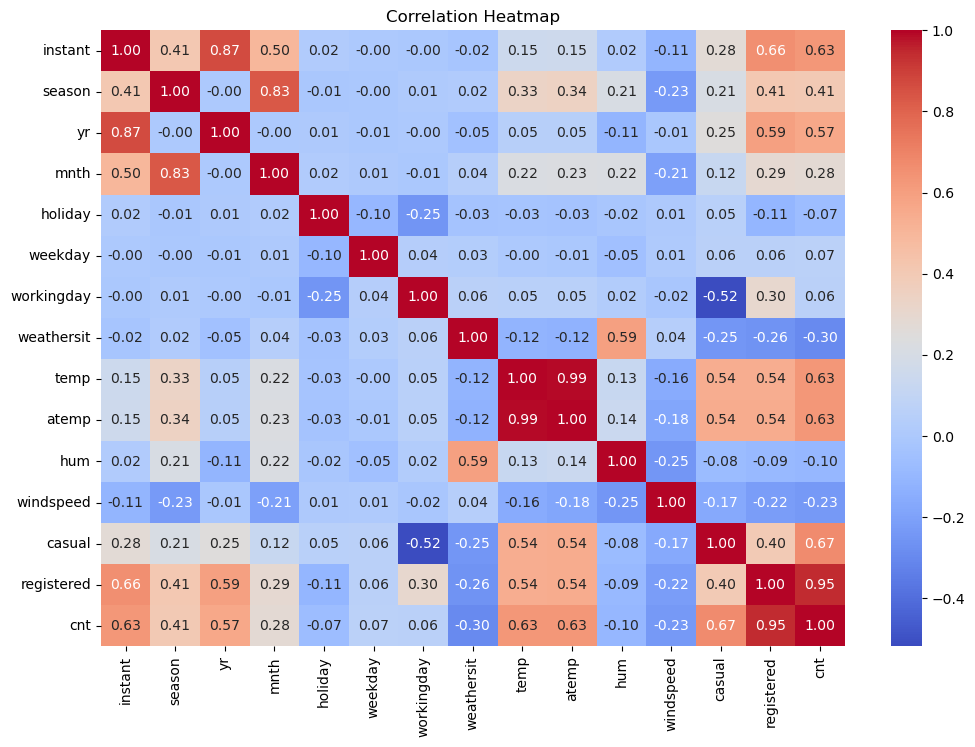

In [22]:
# Plot Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Exploratory Tabel hour_df

In [23]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2914,2915,2011-05-06,2,0,5,8,0,5,1,1,0.42,0.4242,0.77,0.2537,35,415,450
4399,4400,2011-07-07,3,0,7,5,0,4,1,1,0.64,0.5758,0.89,0.1045,2,30,32
1396,1397,2011-03-03,1,0,3,11,0,4,1,1,0.20,0.2273,0.29,0.0896,10,40,50
14175,14176,2012-08-18,3,1,8,20,0,6,0,1,0.70,0.6364,0.45,0.1045,99,242,341
14978,14979,2012-09-21,3,1,9,7,0,5,1,1,0.52,0.5000,0.77,0.0000,35,468,503


In [24]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


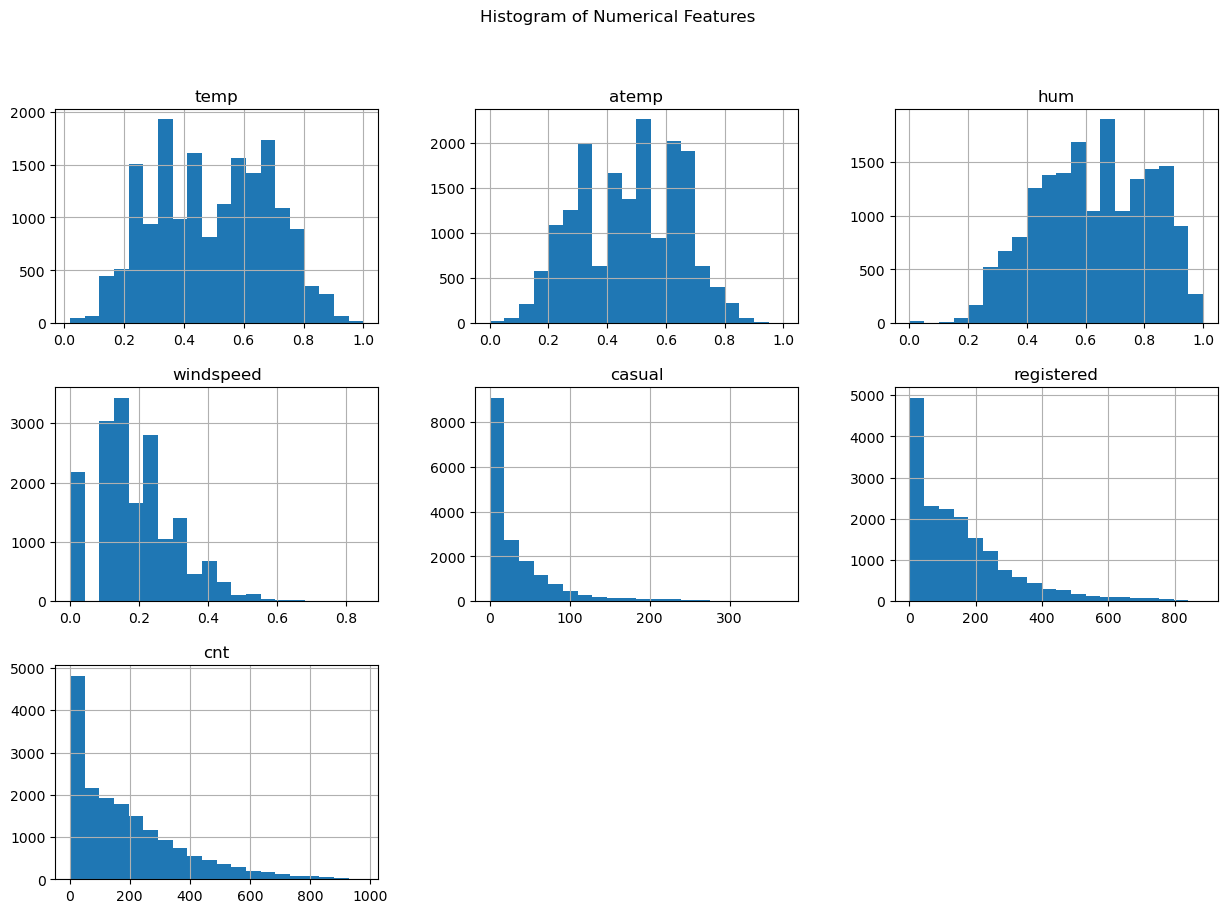

In [25]:
# Analisis Distribusi Data

numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
hour_df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

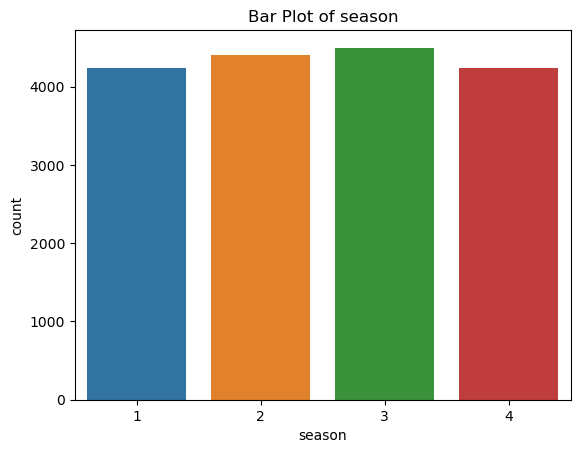

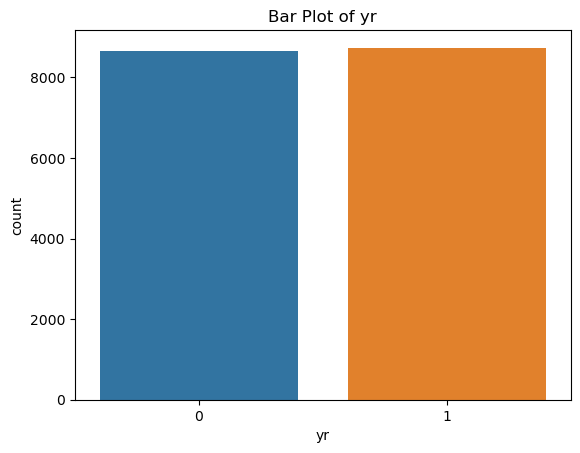

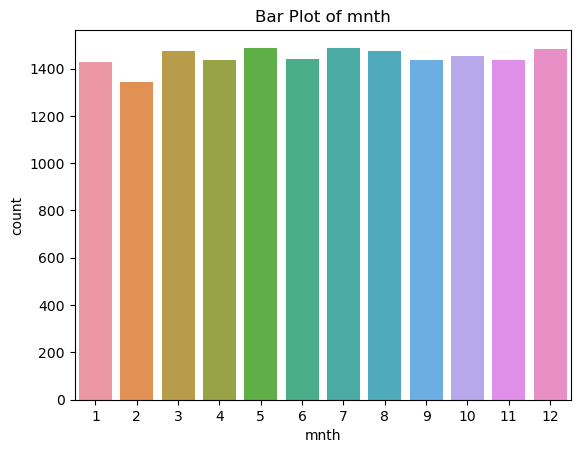

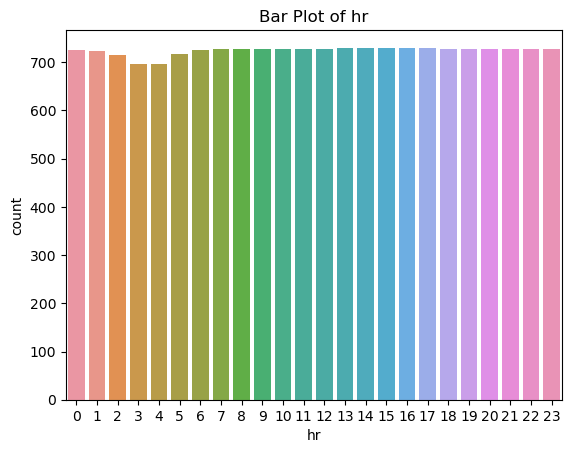

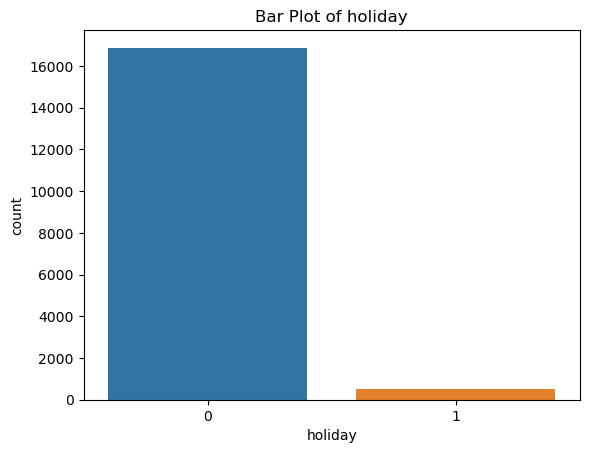

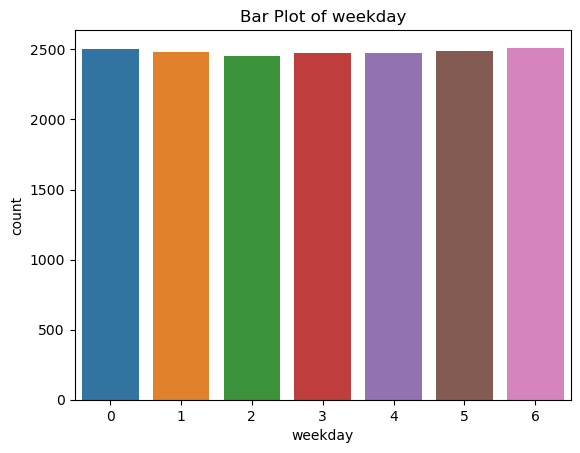

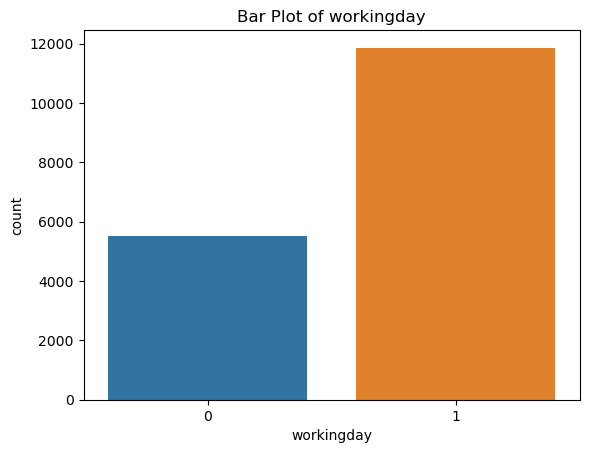

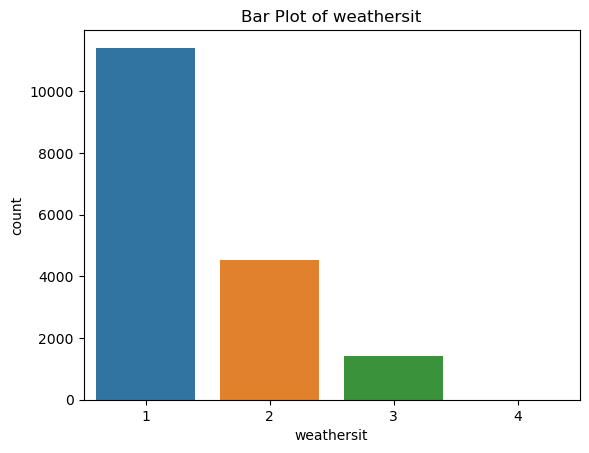

In [26]:
# Bar Plot Untuk Variabel Kategorikal

categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features:
    sns.countplot(x=feature, data=hour_df)
    plt.title(f'Bar Plot of {feature}')
    plt.show()

In [28]:
# Menghapus Kolom 'dteday' Sebelum Menghitung Korelasi

hour_df_numeric = hour_df.drop(columns=['dteday'])

In [29]:
# Menghitung Korelasi

correlation = hour_df_numeric.corr()

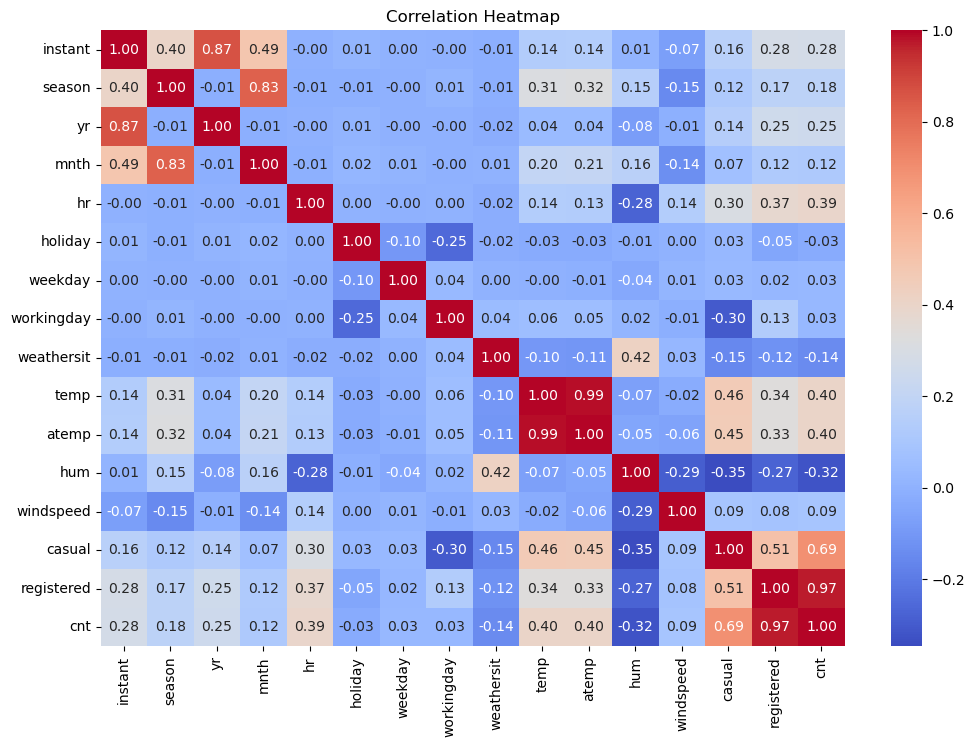

In [34]:
# Plot Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

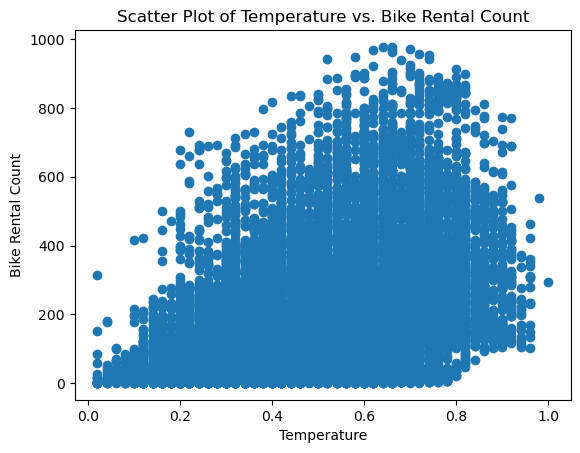

In [37]:
# Analisis Hubungan Antara Variabel
# Scatter Plot Antara Variabel Numerik 'temp' dan 'cnt'

plt.scatter(hour_df['temp'], hour_df['cnt'])
plt.title('Scatter Plot of Temperature vs. Bike Rental Count')
plt.xlabel('Temperature')
plt.ylabel('Bike Rental Count')
plt.show()

## Explore All Data ( day_df & hour_df )

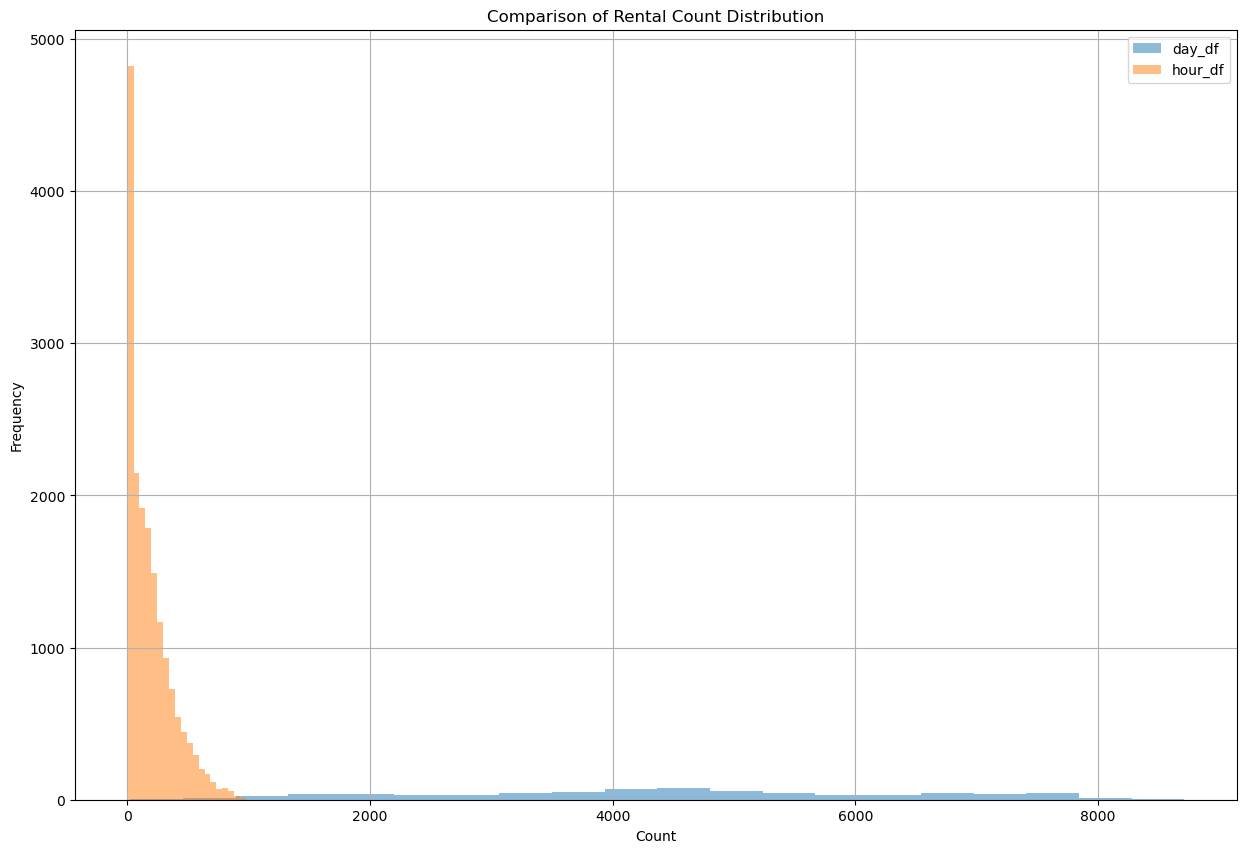

In [38]:
# Membandingkan Distribusi Variabel Antara day_df dan hour_df

plt.figure(figsize=(15, 10))
day_df['cnt'].hist(alpha=0.5, label='day_df', bins=20)
hour_df['cnt'].hist(alpha=0.5, label='hour_df', bins=20)
plt.title('Comparison of Rental Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [39]:
# Menganalisis Korelasi Antara Variabel Yang Sama Dari Kedua Tabel

correlation_day = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
correlation_hour = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

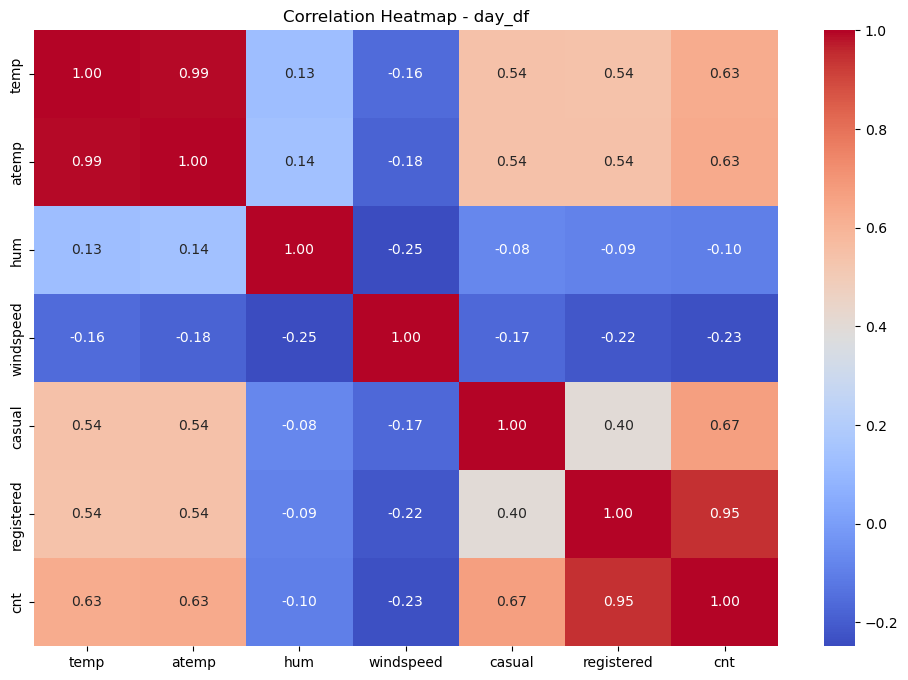

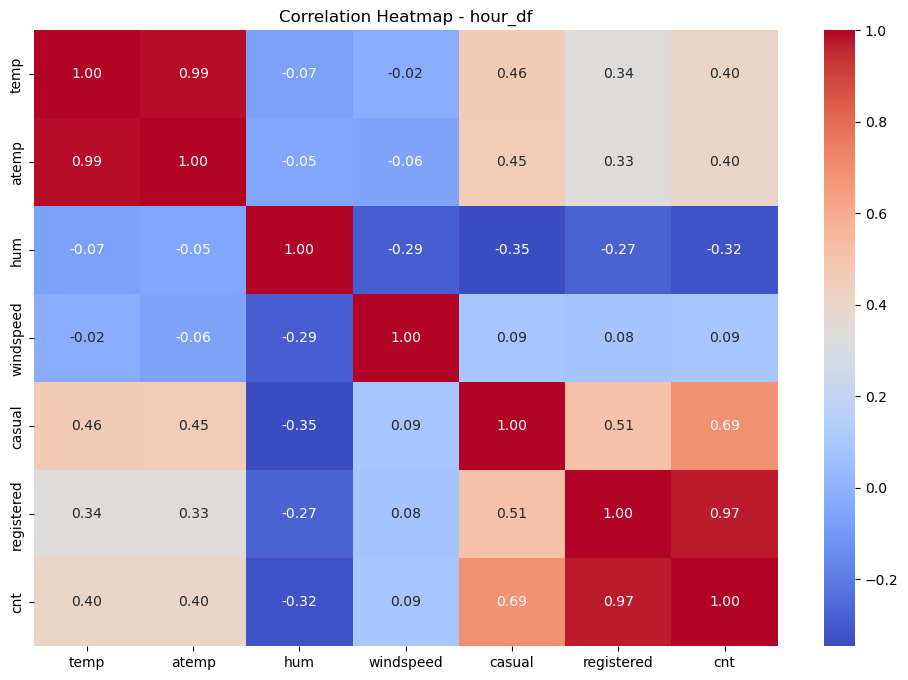

In [41]:
# Visualisasi Heatmap Korelasi

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_day, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - day_df')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_hour, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - hour_df')
plt.show()

In [42]:
## Menggabungkan day_df dan hour_df Berdasarkan Kolom 'dteday'

all_df = pd.merge(left=day_df, right=hour_df, how="inner", on="dteday")

In [43]:
# Menyimpan Gabungan Data Menjadi File CSV

all_df.to_csv('all_data.csv', index=False)

# Visualization & Explanatory Analysis

In [44]:
all_df.sample(5)

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
6149,261,2011-09-18,3,0,9,0,0,0,1,0.507500,...,0,0,2,0.54,0.5152,0.68,0.1045,54,191,245
10012,423,2012-02-27,1,1,2,0,1,1,1,0.366667,...,1,1,1,0.22,0.2273,0.80,0.1343,0,16,16
15985,673,2012-11-03,4,1,11,0,6,0,2,0.343333,...,6,0,2,0.36,0.3333,0.46,0.2836,58,239,297
8018,339,2011-12-05,4,0,12,0,1,1,2,0.385833,...,1,1,1,0.44,0.4394,0.77,0.0000,13,386,399
13985,588,2012-08-10,3,1,8,0,5,1,2,0.715833,...,5,1,1,0.72,0.6970,0.74,0.2836,50,168,218


### Pertanyaan 1 : Bagaimana pola penggunaan sepeda berubah seiring dengan perubahan musim?

In [46]:
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [49]:
# Menentukan Grup Data Berdasarkan Musim

seasonal_data = all_df.groupby('season_x').count()

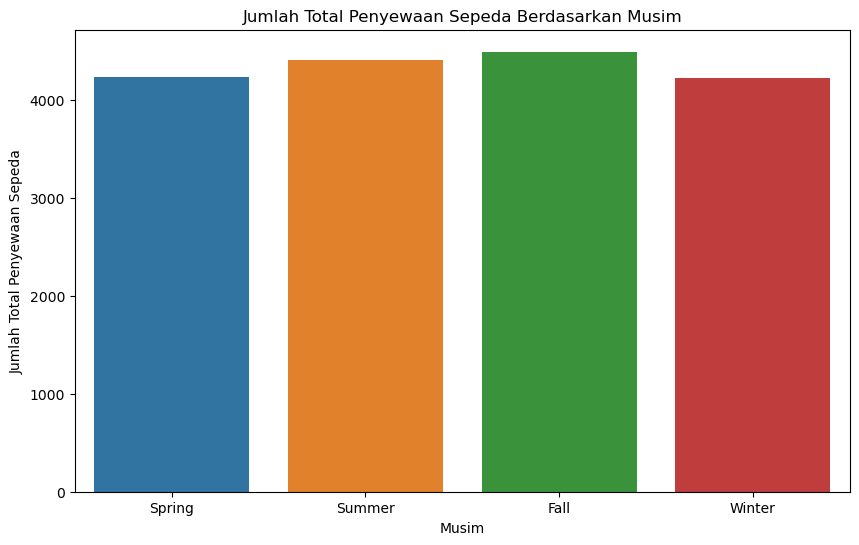

In [51]:
# Visualisasi Data

# Visualisasikan data
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_data.index, y=seasonal_data['cnt_y'])
plt.title('Jumlah Total Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

### Pertanyaan 2 : Apakah ada hubungan antara kondisi cuaca (misalnya, suhu, kelembaban, dan kecepatan angin) dengan jumlah penggunaan sepeda?

In [53]:
print(all_df.columns)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


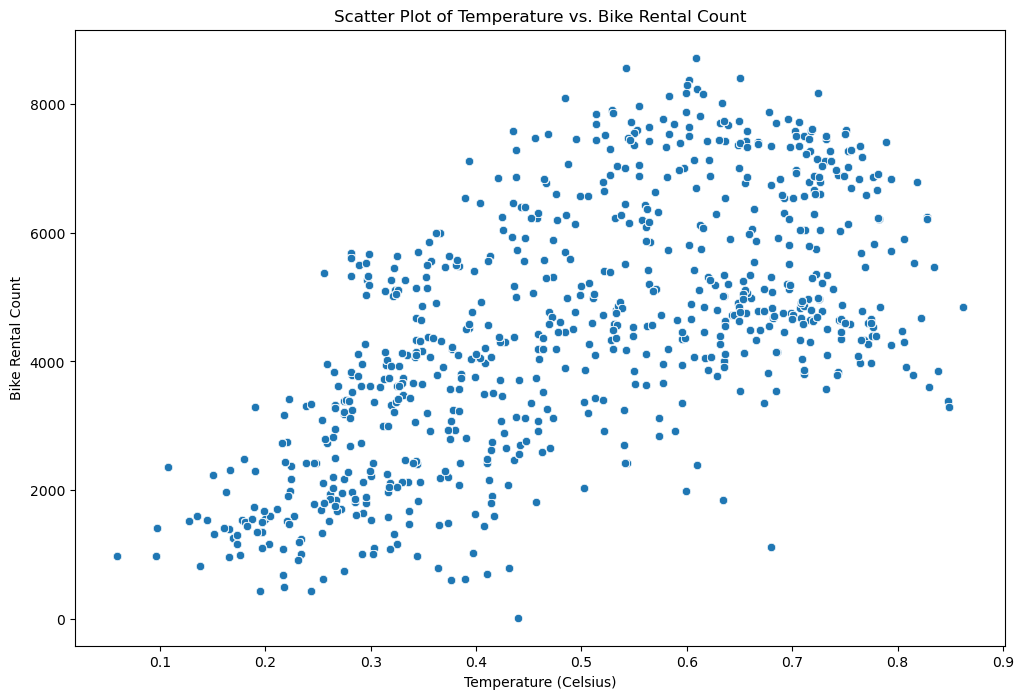

In [54]:
# Scatter plot untuk variabel cuaca dengan jumlah penggunaan sepeda
# Berdasrkan Temperature

plt.figure(figsize=(12, 8))
sns.scatterplot(x='temp_x', y='cnt_x', data=all_df)
plt.title('Scatter Plot of Temperature vs. Bike Rental Count')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Bike Rental Count')
plt.show()

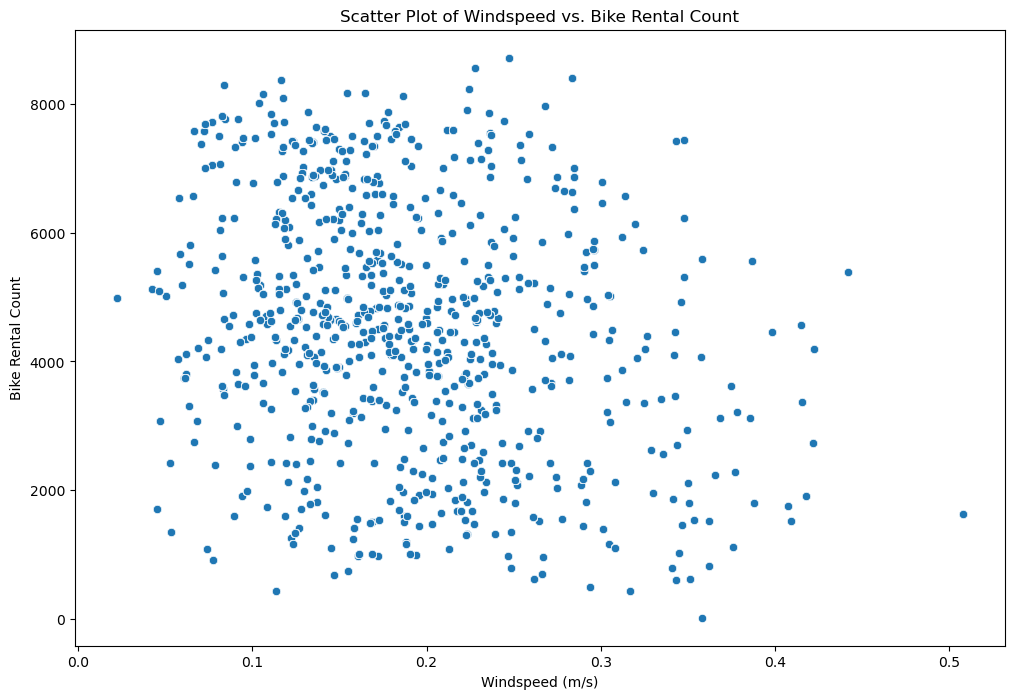

In [57]:
# Berdasarkan Kecepatan Angin

plt.figure(figsize=(12, 8))
sns.scatterplot(x='windspeed_x', y='cnt_x', data=all_df)
plt.title('Scatter Plot of Windspeed vs. Bike Rental Count')
plt.xlabel('Windspeed (m/s)')
plt.ylabel('Bike Rental Count')
plt.show()

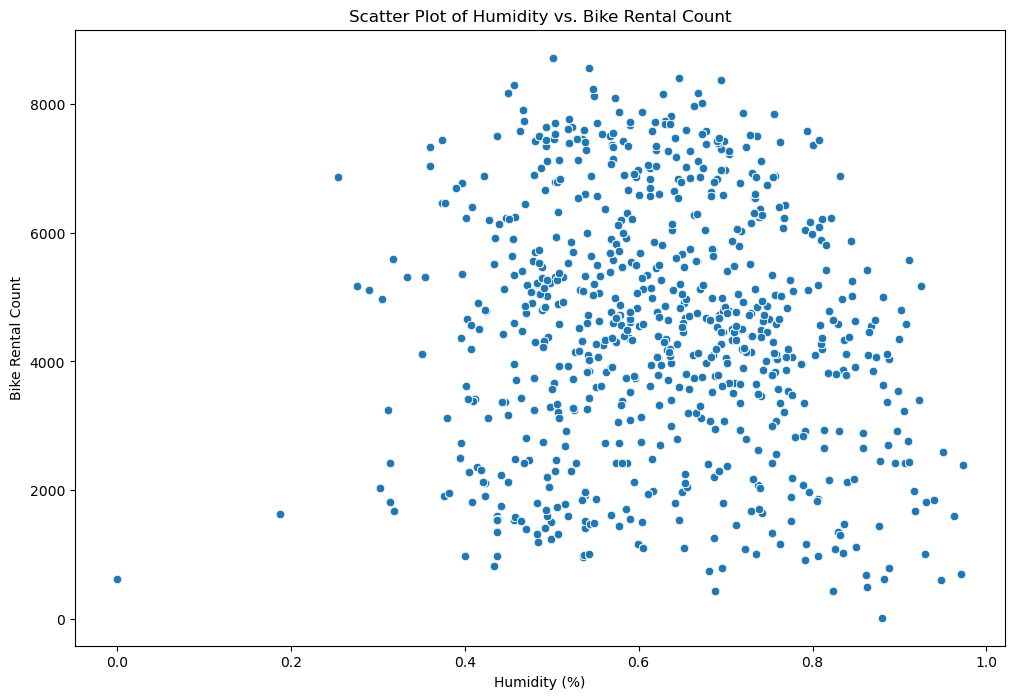

In [60]:
# Berdasarkan Kelembaban Udara

plt.figure(figsize=(12, 8))
sns.scatterplot(x='hum_x', y='cnt_x', data=all_df)
plt.title('Scatter Plot of Humidity vs. Bike Rental Count')
plt.xlabel('Humidity (%)')
plt.ylabel('Bike Rental Count')
plt.show()

In [65]:
# Analisis Korelasi

correlation_weather = all_df[['temp_x', 'hum_x', 'windspeed_x', 'cnt_x', 'temp_y', 'hum_y', 'windspeed_y', 'cnt_x']].corr()

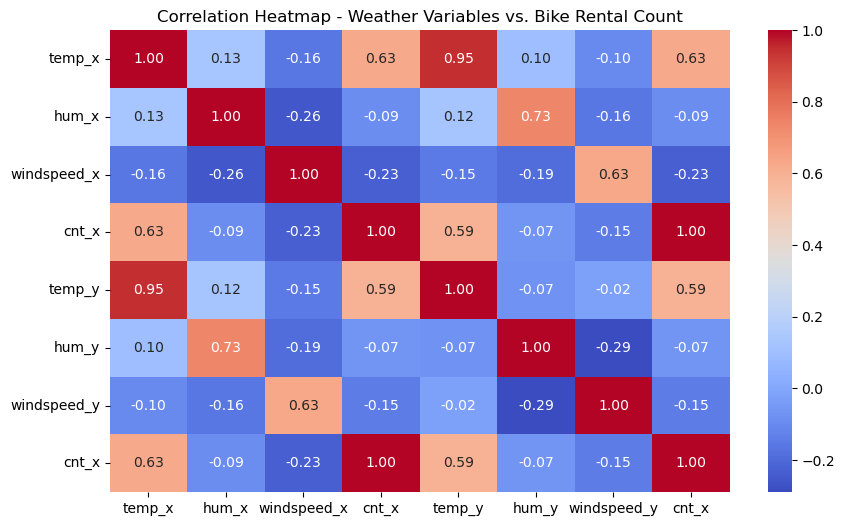

In [66]:
# Visualisasi Heatmap Korelasi

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_weather, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Weather Variables vs. Bike Rental Count')
plt.show()

# Conclusion

### Conclusion Pertanyaan 1 : Bagaimana pola penggunaan sepeda berubah seiring dengan perubahan musim?

1. Dari analisa yang dibuat, dapat disimpulkan bahwa penggunaan sepeda cenderung meningkat selama musim semi (spring) dan musim panas (summer), sementara menurun pada musim gugur (fall) dan musim dingin (winter).

2. Jumlah Pengguna sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur.

3. Selain itu analisis ini juga melihat peningkatan penggunaan sepeda dari tahun ke tahun.

4. Analisis lebih lanjut dapat dilakukan dengan memeriksa daily pattern serta mempertimbangkan faktor lainnya seperti kondisi cuaca.

### Conclusion Pertanyaan 2 : Apakah ada hubungan antara kondisi cuaca (misalnya, suhu, kelembaban, dan kecepatan angin) dengan jumlah penggunaan sepeda?

1. Berdasarkan visualisasi menggunakan scatter plot dan analisa korelasi, dapat dilihat bahwa terdapat hubungan yang signifikan antara suhu dan jumlah penggunaan sepeda. semakin tinggi temperatur, semakin tinggi pula penggunaan sepeda.

2. Tetapi tidak ada hubungan yang signifikan antara humidity  dan windspeed dengan jumlah penggunaan sepeda. visualisasi scatter plot menunjukkan bahwa tidak ada pattern yang jelas dan korelasi antara kedua variabel tersebut.

3. Maka dari itu dapat disimpulkan bahwa temperature memiliki pengaruh yang cukup signifikan terhadap jumlah penggunaan sepeda, sementara humidity dan windspeed tidak berpengaruh secara signifikan.